# Compare the different scores, cosines, spec2vec and Tanimoto

In [12]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Importing Cosine Similarities with NIST powers

In [13]:
import numpy as np

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06.npy')
matrix_similarities_nist = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06_matches.npy')
matrix_matches_nist = np.load(filename)

print("Matrix dimension", matrix_similarities_nist.shape)

Matrix dimension (14359, 14359)


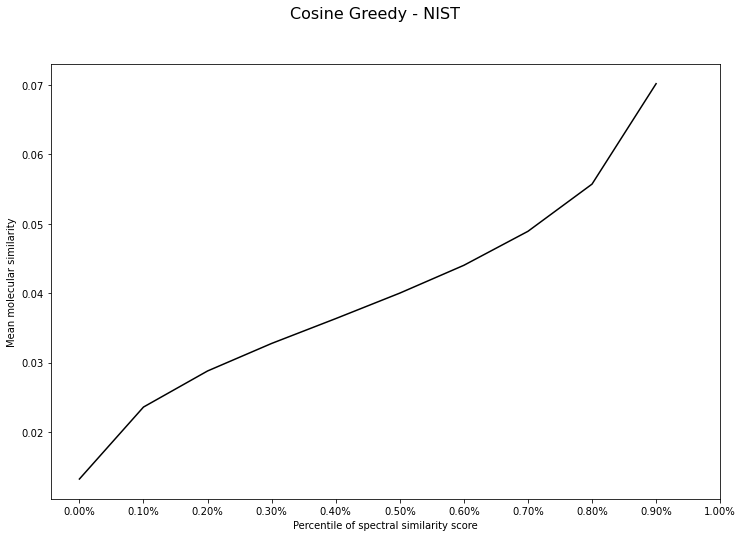

In [96]:
from matplotlib import pyplot as plt

def plot_similarity_matrix_percentile(spectra, title=None):
    
    cloned_spectra = spectra.copy()
    
    avg = np.sort([np.mean(s) for s in cloned_spectra])

    y_axis = [avg[int((i+1)/10*len(avg))-(int(0.1*len(avg))) : int((i+1)/10*len(avg))] for i in range(10)]
    y_axis = [np.mean(s) for s in y_axis]
    
    x_axis = np.linspace(0,1,11)[:-1]

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(
        x_axis,
        y_axis,
        color='black')
    if title is not None:
        plt.suptitle(title, fontsize=16)
    plt.xticks(np.linspace(0, 1, 11),
           ["{:.2f}%".format(x) for x in np.linspace(0, 1, 11)])
    plt.xlabel("Percentile of spectral similarity score")
    plt.ylabel("Mean molecular similarity")
    
plot_similarity_matrix_percentile(matrix_similarities_nist, "Cosine Greedy - NIST")

## Importing Cosine Similarities with MassBank powers

In [86]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05.npy')
matrix_similarities_massbank = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05_matches.npy')
matrix_matches_massbank = np.load(filename)

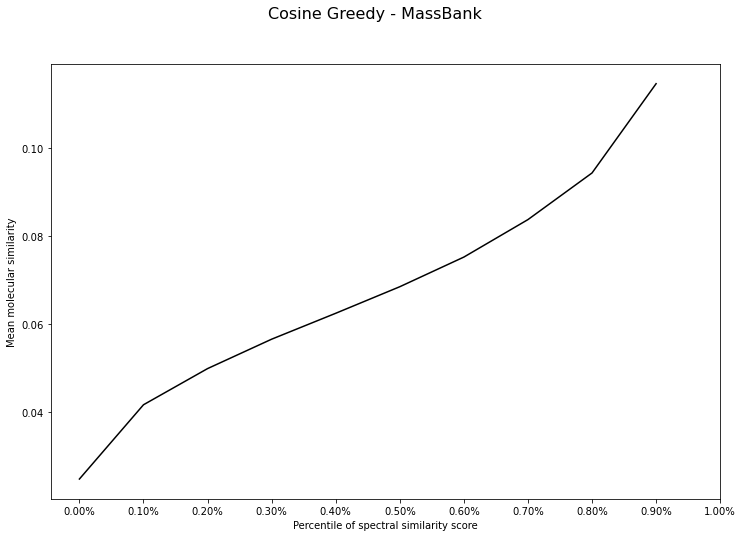

In [97]:
plot_similarity_matrix_percentile(matrix_similarities_massbank, "Cosine Greedy - MassBank")

## Importing Cosine Similarities with Demuth powers

In [88]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033.npy')
matrix_similarities_demuth = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033_matches.npy')
matrix_matches_demuth = np.load(filename)

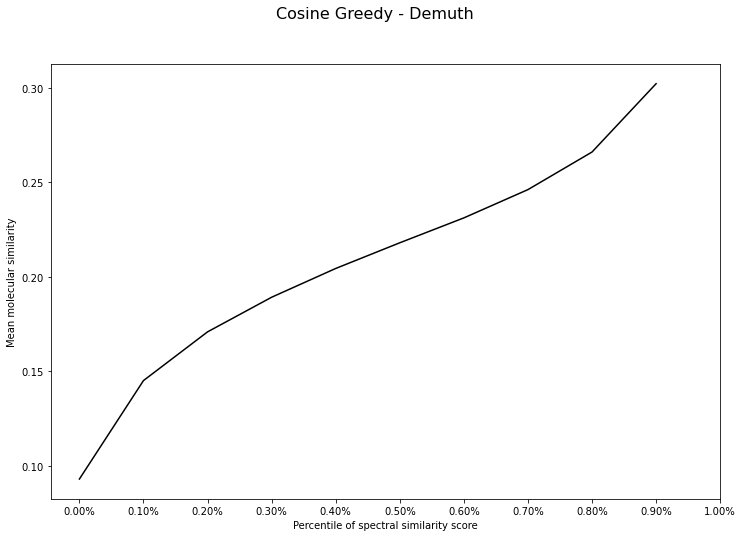

In [98]:
plot_similarity_matrix_percentile(matrix_similarities_demuth, "Cosine Greedy - Demuth")


## Importing Tanimoto Similarities

In [91]:
filename = os.path.join(path, "gcms_similarities_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

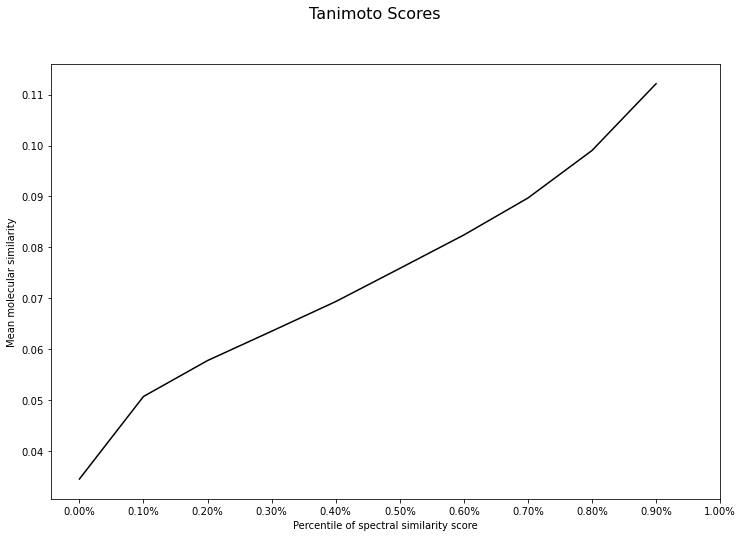

In [99]:
plot_similarity_matrix_percentile(matrix_similarities_tanimoto, "Tanimoto Scores")


## Importing Spec2vec Similarities

In [93]:
filename = os.path.join(path, "similarities_spec2vec_mona_gc_ms_20iter.npy")
matrix_similarities_sspec2vec = np.load(filename)

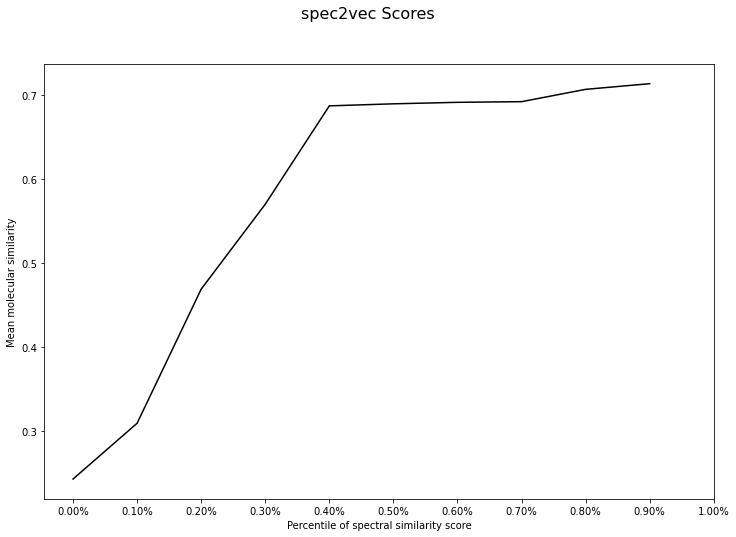

In [100]:
plot_similarity_matrix_percentile(matrix_similarities_sspec2vec, "spec2vec Scores")
